In [1]:
import seml
import seaborn as sns

In [2]:
results = seml.get_results('atac_atac_prediction_counts', to_data_frame=True,  fields=["config", "config_hash", "result"],)

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

0     True
1     True
2     True
3     True
4     True
      ... 
65    True
66    True
67    True
68    True
69    True
Name: config.data.batch, Length: 70, dtype: bool

In [17]:
results = results[results['config.data.batch'].apply(isinstance,args = [str])]

<AxesSubplot:xlabel='config.setup.model_params.n_latent', ylabel='result.average_precision'>

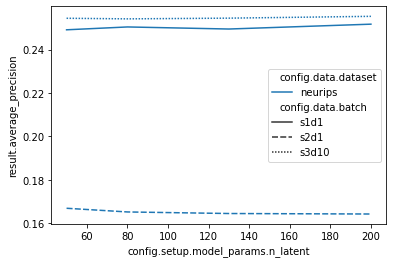

In [19]:
sns.lineplot(data = results[results["config.model.model_type"] == "peakvi"], x='config.setup.model_params.n_latent', y='result.average_precision', hue='config.data.dataset',style='config.data.batch' )

<AxesSubplot:xlabel='config.setup.model_params.n_latent', ylabel='result.average_precision'>

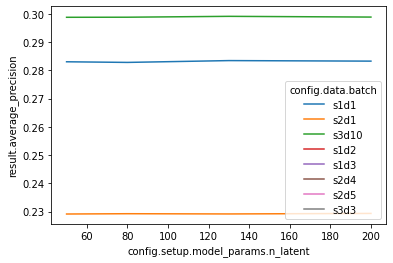

In [21]:
sns.lineplot(data = results[results["config.model.model_type"] == "count"], x='config.setup.model_params.n_latent', y='result.average_precision', hue='config.data.batch' )

<AxesSubplot:xlabel='config.data.batch', ylabel='result.rmse'>

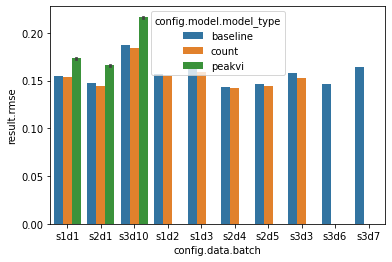

In [22]:
sns.barplot(data = results, x='config.data.batch', y='result.rmse', hue='config.model.model_type')

<AxesSubplot:xlabel='config.data.batch', ylabel='result.bce'>

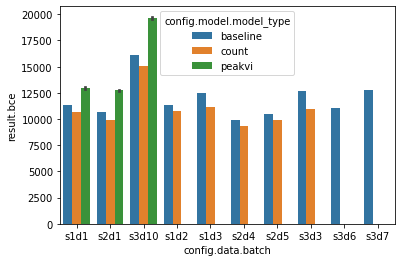

In [23]:
sns.barplot(data = results, x='config.data.batch', y='result.bce', hue='config.model.model_type')

<AxesSubplot:xlabel='config.data.batch', ylabel='result.nmi'>

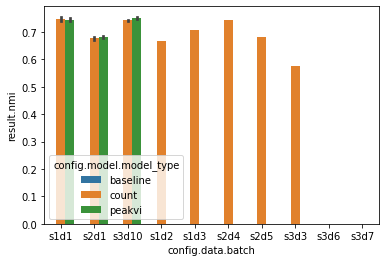

In [24]:
sns.barplot(data = results, x='config.data.batch', y='result.nmi', hue='config.model.model_type')

<AxesSubplot:xlabel='config.data.batch', ylabel='result.ari'>

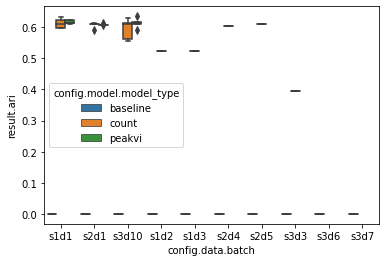

In [25]:
sns.boxplot(data = results, x='config.data.batch', y='result.ari', hue='config.model.model_type')

<AxesSubplot:xlabel='config.data.batch', ylabel='result.nmi'>

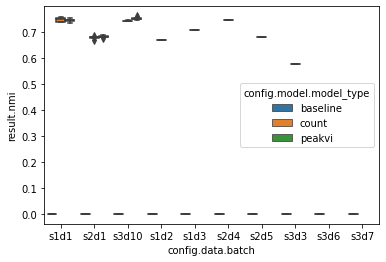

In [26]:
sns.boxplot(data = results, x='config.data.batch', y='result.nmi', hue='config.model.model_type')

<AxesSubplot:xlabel='config.setup.model_params.n_latent', ylabel='result.ari'>

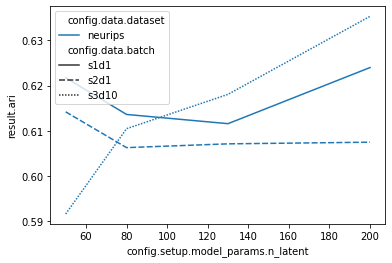

In [27]:
sns.lineplot(data = results[results["config.model.model_type"] == "peakvi"], x='config.setup.model_params.n_latent', y='result.ari', hue='config.data.dataset',style='config.data.batch' )

<AxesSubplot:xlabel='config.setup.model_params.n_latent', ylabel='result.ari'>

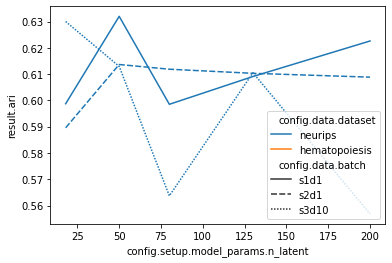

In [8]:
sns.lineplot(data = results[results["config.model.model_type"] == "count"], x='config.setup.model_params.n_latent', y='result.ari', hue='config.data.dataset',style='config.data.batch' )

In [1]:
from utils import plot_embedding

Global seed set to 0
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

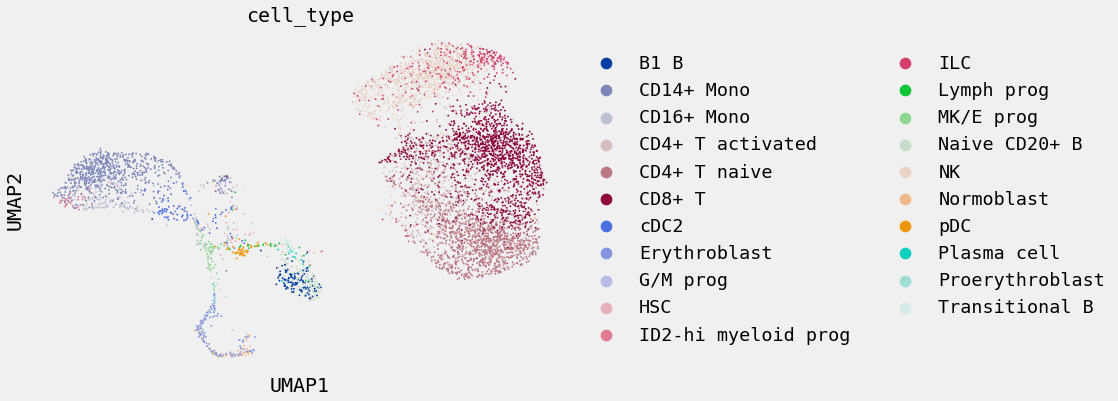

In [12]:
adata = plot_embedding('atac_atac_prediction_counts', "319ce03ecb9a071fad11a73f60e50efd")

In [8]:
adata

AnnData object with n_obs × n_vars = 5616 × 116490
    obs: 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'cell_type', 'pseudotime_order_ATAC', 'batch', 'pseudotime_order_GEX', 'is_train', '_scvi_batch', '_scvi_labels'
    var: 'feature_types'
    uns: 'dataset_id', 'gene_activity_var_names', 'organism', 'sample_pm_varnames', '_scvi_uuid', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'gene_activity', 'lsi_full', 'lsi_red', 'X_emb', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'